# Creating a Bathymetric Surface from ICESAT-2 data

The spaceborne ICESAT-2 LiDAR instrument is a photo counting LiDAR which has a wavelength of 532 nm. At this wavelength the signal penetrates into waterbodies and therefore point samples of water depths can be retrived (e.g., Thomas et al., 2021) down to 40 m in depth. However, given that icesat-2 just provides point samples it would be useful to be able to use these samples to create a bathymetric surface. The visible bands of optical data (e.g., Landsat and Sentinel-2) also provide some information from below the water surface (e.g., Thomas et al., 2021) and these can be assumed to have some relationship to the depth of the water. 

In these notebooks you will explore this relationship and look at two methods of using multiple satellite images as with cloud cover is very often the case that multiple images will be required. Therefore, these notebooks will show you how to generate image composites using RSGISLib and to summarise results from multiple images. 

See ICESAT-2 technical specification: https://icesat-2.gsfc.nasa.gov/science/specs


Thomas, N. et al. Space‐Borne Cloud‐Native Satellite‐Derived Bathymetry (SDB) Models Using ICESat‐2 And Sentinel‐2. Geophys Res Lett 48, (2021).


# Visualise ICESAT-2

This first notebook will look at visualising some of the ICESAT-2.


# 1. Imports

In [1]:
import os

import geopandas

%matplotlib inline
import matplotlib.pyplot as plt
import numpy
from shapely.geometry import Polygon

# 2. Specify the input layers

In [2]:
vec_file = "../data/is2_bathy/is2_bermuda_depth.gpkg"

vec_lyr_path1 = "ic2_depth_bermuda_path1"
vec_lyr_path2 = "ic2_depth_bermuda_path2"
vec_lyr_path3 = "ic2_depth_bermuda_path3"
vec_lyr_path4 = "ic2_depth_bermuda_path4"
vec_lyr_path5 = "ic2_depth_bermuda_path5"
vec_lyr_path6 = "ic2_depth_bermuda_path6"
vec_lyr_path7 = "ic2_depth_bermuda_path7"
vec_lyr_path8 = "ic2_depth_bermuda_path8"

# 3. Read Layer to Data Frame

In [3]:
path1_gpd_df = geopandas.read_file(vec_file, layer=vec_lyr_path1)
path1_gpd_df

,field_1,Longitude,Latitude,PhotonHeig,Depth,LandConfid,geometry
0,0,330534.74964,3.575675e+06,-4.528613,-4.782535,-1,POINT (330534.750 3575675.343)
1,1,330534.46428,3.575679e+06,-3.525469,-3.779392,-1,POINT (330534.464 3575678.871)
2,2,330533.69081,3.575688e+06,-3.859086,-4.113008,-1,POINT (330533.691 3575688.059)
3,3,330532.69144,3.575701e+06,-3.008932,-3.262854,-1,POINT (330532.691 3575700.737)
4,4,330531.90601,3.575711e+06,-4.282633,-4.536555,-1,POINT (330531.906 3575710.601)
...,...,...,...,...,...,...,...
11375,11375,329202.44839,3.592284e+06,-7.953201,-8.207124,4,POINT (329202.448 3592283.854)
11376,11376,329202.32185,3.592285e+06,-8.135677,-8.389600,4,POINT (329202.322 3592285.259)
11377,11377,329202.32253,3.592285e+06,-8.039972,-8.293894,4,POINT (329202.323 3592285.259)
11378,11378,329202.26020,3.592286e+06,-7.981982,-8.235905,1,POINT (329202.260 3592285.960)


# 4. Visualise Path 1

<AxesSubplot:>

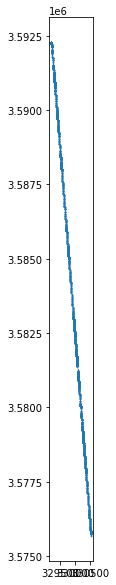

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
path1_gpd_df.plot(ax=ax, marker=".", markersize=0.5)

# 5. Subset the Path for Plotting

## 5.1 Define the BBOX

<AxesSubplot:>

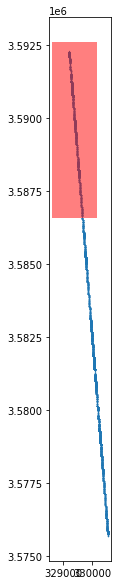

In [5]:
min_x = 328622
max_x = 330146
min_y = 3586577
max_y = 3592615

# Create a custom polygon
sub_poly = Polygon(
    [(min_x, max_y), (max_x, max_y), (max_x, min_y), (min_x, min_y), (min_x, max_y)]
)
sub_poly_gdf = geopandas.GeoDataFrame([1], geometry=[sub_poly], crs=path1_gpd_df.crs)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
path1_gpd_df.plot(ax=ax, marker=".", markersize=0.5)
sub_poly_gdf.plot(ax=ax, color="red", alpha=0.5)

## 5.2 Subset the GeoDataFrame

Use the clip function.


In [6]:
path1_gpd_df_sub = path1_gpd_df.clip(sub_poly)
path1_gpd_df_sub

,field_1,Longitude,Latitude,PhotonHeig,Depth,LandConfid,geometry
7411,7411,329659.58825,3.586578e+06,-16.550852,-16.804774,4,POINT (329659.588 3586577.538)
7412,7412,329659.58310,3.586578e+06,-17.269337,-17.523259,4,POINT (329659.583 3586577.541)
7413,7413,329659.57799,3.586578e+06,-17.980932,-18.234855,0,POINT (329659.578 3586577.543)
7414,7414,329659.53645,3.586578e+06,-15.936472,-16.190395,0,POINT (329659.536 3586578.247)
7415,7415,329659.14207,3.586583e+06,-15.929648,-16.183571,4,POINT (329659.142 3586583.222)
...,...,...,...,...,...,...,...
11374,11374,329202.44730,3.592284e+06,-8.105684,-8.359606,0,POINT (329202.447 3592283.855)
11377,11377,329202.32253,3.592285e+06,-8.039972,-8.293894,4,POINT (329202.323 3592285.259)
11376,11376,329202.32185,3.592285e+06,-8.135677,-8.389600,4,POINT (329202.322 3592285.259)
11378,11378,329202.26020,3.592286e+06,-7.981982,-8.235905,1,POINT (329202.260 3592285.960)


## 5.3 Plot the subset

<AxesSubplot:>

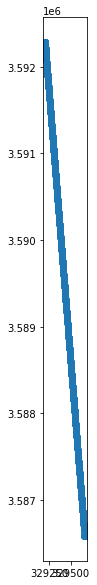

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
path1_gpd_df_sub.plot(ax=ax)

# 6. Plot Depth values

## 6.1 Get Depth and Latitude Values

In [8]:
# Get the latidude and depth values to create scatter plot.
depth_vals = path1_gpd_df_sub["Depth"].values
lat_vals = path1_gpd_df_sub["Latitude"].values

## 6.2 Plot the Depths

The blue line is the water surface while the black points are the depths below the surface. Note, the scale in the x and y axis of the plot are different so bare that in mind when interpreting the plot.

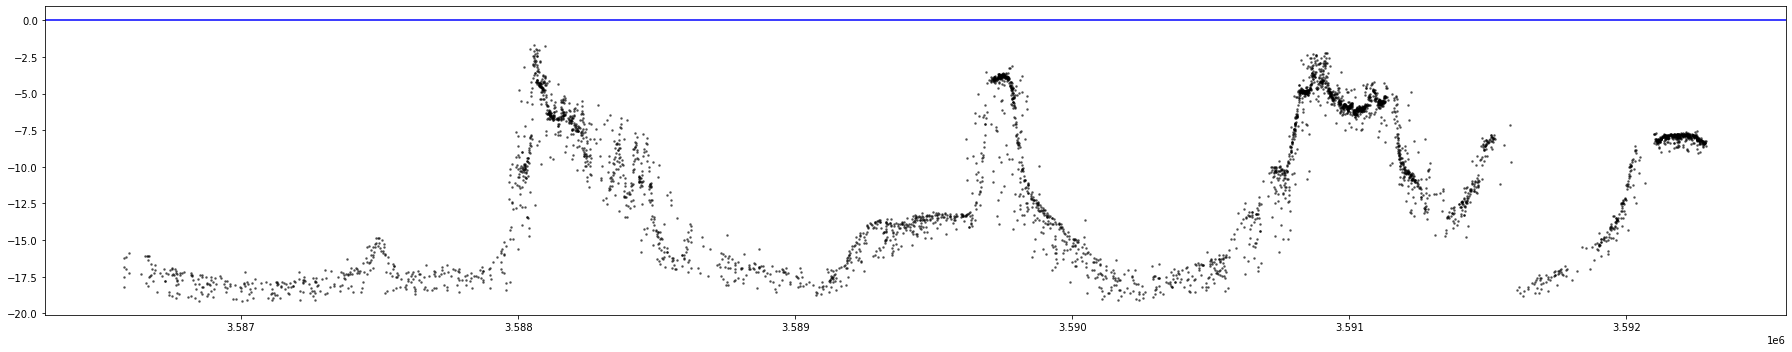

In [9]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 5))
ax.scatter(lat_vals, depth_vals, s=10, marker=".", color="black", alpha=0.5)
ax.axhline(y=0.0, color="blue", linestyle="-")
fig.tight_layout()